In [4]:
import sys
import os
import json
import re
import string
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
df = pd.read_csv('df.csv')
df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022-04-22 22:17:05+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,0.16,0.54,en,188,43,davideiacovozzi,18,55,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",NaN,NaN,NaN,NaN,NaN
1,2022-04-22 13:44:53+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,0.15,0.175,en,179,32,davideiacovozzi,18,55,NaN,[],NaN,NaN,NaN,NaN,NaN
2,2022-04-22 06:10:34+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,0,0,en,193,26,davideiacovozzi,18,55,FALSE,[],NaN,NaN,NaN,NaN,NaN
3,2022-04-21 17:22:09+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @charliebilello: The 30-year mortgage rate ...,0,0.183333333,en,620,213,davideiacovozzi,18,55,NaN,[],NaN,NaN,NaN,NaN,NaN
4,2022-04-21 10:32:26+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @biancoresearch: Rates rise until something...,-0.4,0.4,en,1787,417,davideiacovozzi,18,55,FALSE,[],NaN,NaN,NaN,NaN,NaN


In [ ]:
# clean the dataframe
# inbuilt modules
from fix_extract_dataframe import ExtractTweets
from fix_clean_tweets_dataframe import TweetCleanser
cleanser = TweetCleanser(df)
# drop unwanted columns
cleanser.drop_unwanted_column(df)
# drop duplicate values from original text
cleanser.drop_duplicate(df)
# convert date data to appropriate datetime
cleanser.convert_to_datetime(df)
# remove non english texts
df_ = cleanser.remove_non_english_tweets(df)

In [64]:
class DataLoader:
  def __init__(self,dir_name,file_name):
    self.dir_name=dir_name
    self.file_name = file_name
    
 
  def read_csv(self):
    os.chdir(self.dir_name)
    tweets_df=pd.read_csv(self.file_name)
    return tweets_df
  

In [48]:
df.dropna()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,Unnamed: 15,Unnamed: 16,Unnamed: 17


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27100 entries, 0 to 27099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          23234 non-null  object
 1   source              20213 non-null  object
 2   original_text       20070 non-null  object
 3   polarity            15257 non-null  object
 4   subjectivity        15255 non-null  object
 5   lang                15195 non-null  object
 6   favorite_count      15180 non-null  object
 7   retweet_count       15180 non-null  object
 8   original_author     15180 non-null  object
 9   followers_count     13012 non-null  object
 10  friends_count       14906 non-null  object
 11  possibly_sensitive  4230 non-null   object
 12  hashtags            13262 non-null  object
 13  user_mentions       307 non-null    object
 14  place               7065 non-null   object
 15  Unnamed: 15         25 non-null     object
 16  Unnamed: 16         2 

In [11]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


<AxesSubplot:ylabel='polarity'>

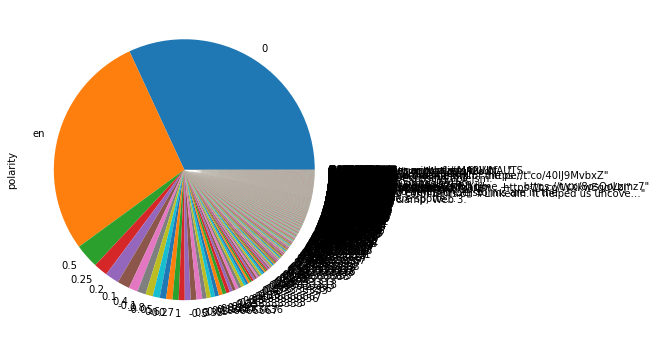

In [27]:
df.polarity.value_counts().plot(kind='pie', )

<AxesSubplot:ylabel='possibly_sensitive'>

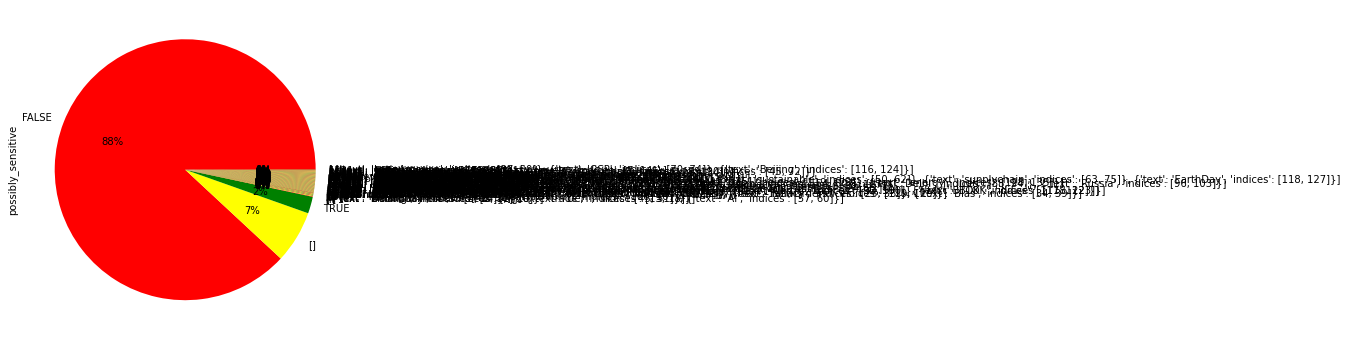

In [28]:
df.possibly_sensitive.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [56]:
# checking for any missing values from the data
missing_values = df.isnull().sum().sum()
missing_values

280222

In [ ]:
cleanTweet = df[['clean-text',  'polarity']]
cleanTweet

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
# apply a model
linear_model = LinearSVC()
linear_model.fit(x_train,y_train)

In [ ]:
# predict results
y_predict = linear_model.predict(x_test)
print(classification_report(y_test,y_predict))